# Handling Missing Values in Dataset - Utkarsh Gaikwad

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Method 1 : Delete missing data values

In [4]:
df.shape

(891, 15)

In [5]:
# Dropping row wise
df.dropna(axis=0).shape

(182, 15)

In [6]:
# Dropping Column wise
df.dropna(axis=1).shape

(891, 11)

## Method 2 : Imputation techniques

### 2.a Mean Value imputation

<AxesSubplot: xlabel='age', ylabel='Count'>

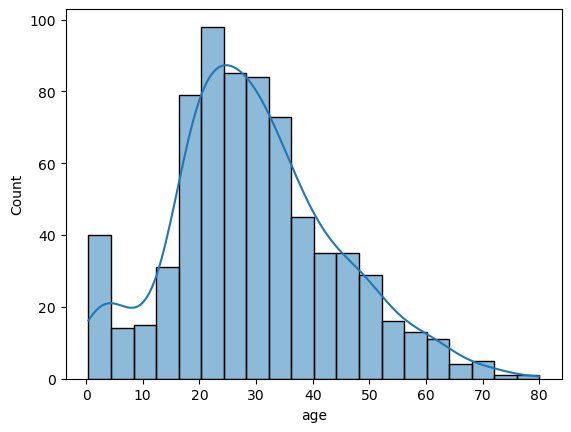

In [7]:
sns.histplot(df['age'],kde=True)

In [8]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [9]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [10]:
# Mean Imputation works well when we have normally distributed data

### 2.b Median Imputation

In [11]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [12]:
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 2.c Mode Imputation

In [13]:
## Applicable to categorical variables

In [14]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df['embarked'].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: embarked, Length: 891, dtype: bool

In [17]:
mode = df[df['embarked'].notna()]['embarked'].mode()[0]
mode

'S'

In [18]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [19]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [20]:
df['embarked_mode'].isnull().sum()

0

In [21]:
df['embarked'].isnull().sum()

2

## KNN Imputer

In [59]:
df = sns.load_dataset('titanic')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
con = list(df.columns[(df.dtypes=='float64') | (df.dtypes=='int64')])
con

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [63]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
filled = imputer.fit_transform(df[con])
df_filled = pd.DataFrame(filled,columns=con)

In [64]:
df_filled.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [65]:
df_filled.isna().any()

survived    False
pclass      False
age         False
sibsp       False
parch       False
fare        False
dtype: bool

## Iterative Imputer

In [42]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=42)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

IterativeImputer(random_state=42)

In [43]:
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

## Example on weather dataset

In [44]:
df_weather = pd.read_csv("https://raw.githubusercontent.com/gchoi/Dataset/master/weatherAUS.csv")

In [45]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [47]:
df_weather.isna().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [48]:
def catconsep(df):
    cat = df.columns[df.dtypes=='object']
    con = df.columns[df.dtypes!='object']
    return list(cat),list(con)

In [49]:
cat, con = catconsep(df_weather)

In [50]:
cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [51]:
con

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [56]:
# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42, max_iter=100)
iter_imputed = iter_imputer.fit_transform(df_weather[con])
df_iter_imputed = pd.DataFrame(iter_imputed,columns=con)
df_iter_imputed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.000000,1.000000,9.1,13.3,0.0
1,1.1,14.5,0.4,2.231172,6.382367,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,5.940769,4.811793,1.3,13.7,0.0
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.000000,4.000000,22.7,24.4,0.2
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.000000,1.000000,20.0,26.1,0.0
4,14.6,25.3,0.0,4.749154,7.325755,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,4.053689,4.781721,22.2,22.6,0.4


In [58]:
df_iter_imputed.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64